In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('distribuicao-renda.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46350 entries, 0 to 46349
Data columns (total 24 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Ano-calendário                                                               46350 non-null  int64  
 1   Ente Federativo                                                              46350 non-null  object 
 2   Centil                                                                       46350 non-null  object 
 3   Quantidade de Contribuintes                                                  46350 non-null  float64
 4   Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]      42935 non-null  object 
 5   Rendimentos Tributaveis - Soma da RTB do Centil [R$ milhões]                 42935 non-null  object 
 6   Rendimentos Tributaveis - RTB Acumulad

In [5]:
# Convertendo colunas numéricas de string para float
cols_to_convert = [
    'Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]',
    'Rendimentos Tributaveis - Soma da RTB do Centil [R$ milhões]',
    'Rendimentos Tributaveis - RTB Acumulada do Centil [R$ milhões]',
    'Rendimentos Tributaveis - Média da RTB do Centil [R$]',
    'Rendimentos Sujeitos à Tribut. Exclusiva [R$ milhões]',
    'Rendimentos Isentos - Lucros e dividendos [R$ milhões]',
    'Rendimentos Isentos - Rendim. Sócio/Titular ME/EPP Opt SIMPLES [R$ milhões]',
    'Rendimentos Isentos - Outros Rendimentos Isentos [R$ milhões]',
    'Despesas Dedutíveis - Previdência [R$ milhões]',
    'Despesas Dedutíveis - Dependentes [R$ milhões]',
    'Despesas Dedutíveis - Instrução [R$ milhões]',
    'Despesas Dedutíveis - Médicas [R$ milhões]',
    'Despesas Dedutíveis - Pensão Alimentícia [R$ milhões]',
    'Despesas Dedutíveis - Livro-Caixa [R$ milhões]',
    'Imposto Devido [R$ milhões]',
    'Bens e Direitos - Imóveis [R$ milhões]',
    'Bens e Direitos - Móveis [R$ milhões]',
    'Bens e Direitos - Financeiros [R$ milhões]',
    'Bens e Direitos - Outros Bens e Direitos [R$ milhões]',
    'Dívidas e Ônus [R$ milhões]'
]

# Remover os pontos e trocar vírgula por ponto decimal
for col in cols_to_convert:
    data[col] = data[col].str.replace('.', '').str.replace(',', '.').astype(float)

# Mostrar uma visão geral dos dados
data.describe()


,Ano-calendário,Quantidade de Contribuintes,Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões],Rendimentos Tributaveis - Soma da RTB do Centil [R$ milhões],Rendimentos Tributaveis - RTB Acumulada do Centil [R$ milhões],Rendimentos Tributaveis - Média da RTB do Centil [R$],Rendimentos Sujeitos à Tribut. Exclusiva [R$ milhões],Rendimentos Isentos - Lucros e dividendos [R$ milhões],Rendimentos Isentos - Rendim. Sócio/Titular ME/EPP Opt SIMPLES [R$ milhões],Rendimentos Isentos - Outros Rendimentos Isentos [R$ milhões],...,Despesas Dedutíveis - Instrução [R$ milhões],Despesas Dedutíveis - Médicas [R$ milhões],Despesas Dedutíveis - Pensão Alimentícia [R$ milhões],Despesas Dedutíveis - Livro-Caixa [R$ milhões],Imposto Devido [R$ milhões],Bens e Direitos - Imóveis [R$ milhões],Bens e Direitos - Móveis [R$ milhões],Bens e Direitos - Financeiros [R$ milhões],Bens e Direitos - Outros Bens e Direitos [R$ milhões],Dívidas e Ônus [R$ milhões]
count,46350.00000,46350.000000,4.293500e+04,42935.000000,4.293500e+04,4.293500e+04,46219.000000,45891.000000,44459.000000,46276.000000,...,42735.000000,42870.000000,42446.000000,39593.000000,38184.000000,46305.000000,46278.000000,4.634700e+04,46062.000000,46216.000000
mean,2013.00000,96.555265,5.919211e+05,1006.819965,2.298308e+04,9.326969e+04,166.247231,168.899223,39.931326,266.030717,...,12.672692,40.600657,9.113101,18.356667,120.152246,1758.729022,327.528452,2.422272e+03,143.172498,376.824414
std,4.32054,197.999486,8.525089e+06,4610.819738,9.299689e+04,1.979622e+05,1102.930733,884.071432,186.705913,1345.856709,...,49.904970,187.205530,47.461856,222.142039,894.635782,8040.161311,1254.874091,1.724952e+04,1312.805967,2229.091637
min,2006.00000,1.001000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2009.00000,2.894000,2.220000e+04,55.640000,7.577900e+02,2.194528e+04,3.230000,3.160000,0.650000,8.660000,...,0.310000,0.850000,0.170000,0.050000,0.080000,53.060000,14.650000,3.902500e+01,1.800000,9.060000
50%,2013.00000,6.790000,3.600000e+04,150.480000,3.072100e+03,3.570926e+04,12.320000,14.510000,3.050000,29.665000,...,1.760000,4.540000,0.990000,0.350000,3.360000,181.790000,45.400000,1.525900e+02,7.430000,35.475000
75%,2017.00000,29.169000,7.666879e+04,467.390000,1.094475e+04,7.493178e+04,51.950000,63.925000,14.460000,111.622500,...,6.850000,18.930000,3.990000,2.330000,28.610000,785.200000,168.265000,6.972450e+02,34.947500,151.402500
max,2020.00000,993.000000,4.293647e+08,212033.290000,1.975433e+06,8.358881e+06,64340.390000,45567.300000,9265.540000,75591.400000,...,657.640000,6013.140000,1706.470000,11378.180000,45957.400000,415722.650000,43982.470000,1.076766e+06,105240.500000,154018.410000


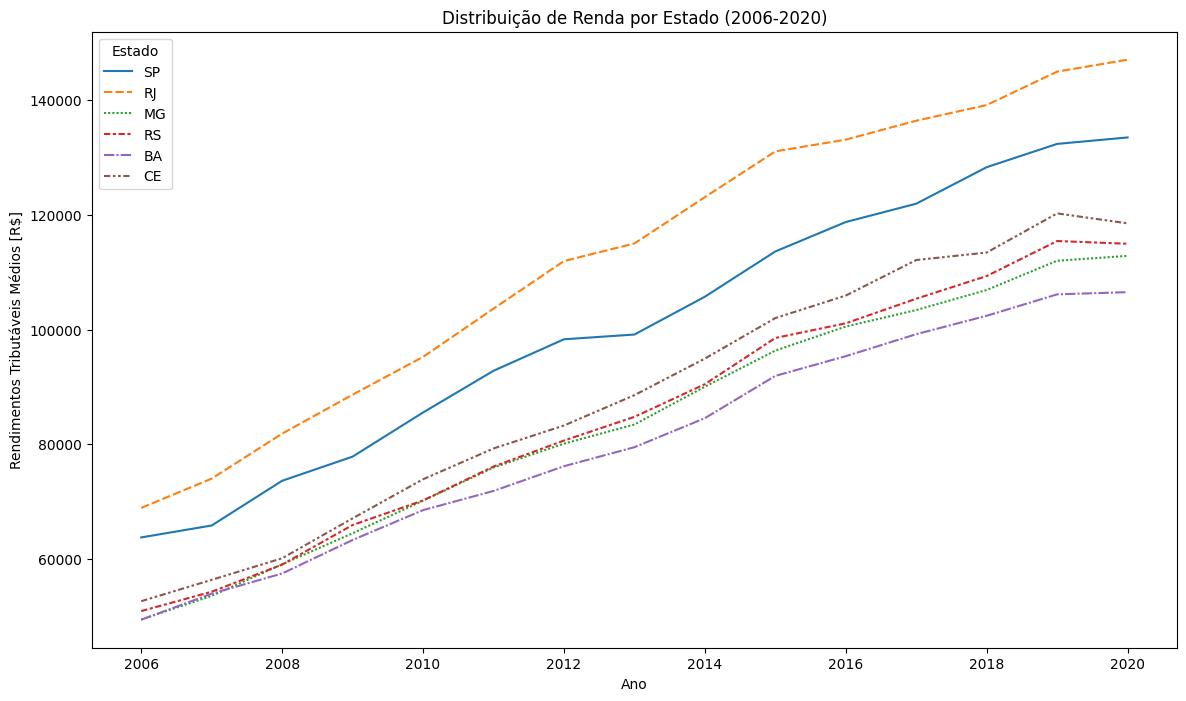

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média dos rendimentos tributáveis por estado e ano
state_income = data.groupby(['Ano-calendário', 'Ente Federativo'])['Rendimentos Tributaveis - Média da RTB do Centil [R$]'].mean().reset_index()

# Pivotar os dados para facilitar a visualização
state_income_pivot = state_income.pivot(index='Ano-calendário', columns='Ente Federativo', values='Rendimentos Tributaveis - Média da RTB do Centil [R$]')

# Plotar a distribuição de renda ao longo dos anos para alguns estados
plt.figure(figsize=(14, 8))
sns.lineplot(data=state_income_pivot[['SP', 'RJ', 'MG', 'RS', 'BA', 'CE']])
plt.title('Distribuição de Renda por Estado (2006-2020)')
plt.xlabel('Ano')
plt.ylabel('Rendimentos Tributáveis Médios [R$]')
plt.legend(title='Estado')
plt.show()



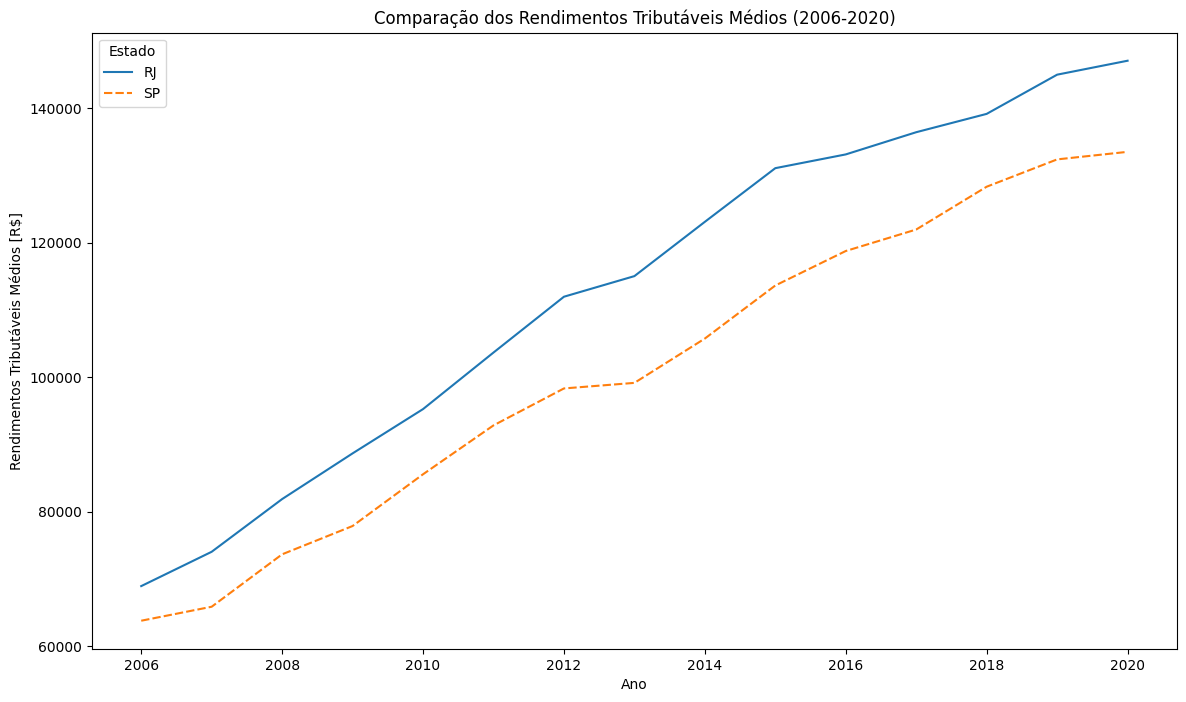

(count        15.000000
 mean     112940.507718
 std       26294.302359
 min       68912.912157
 25%       91942.945009
 50%      115011.413077
 75%      134762.475097
 max      147044.134272
 Name: Rendimentos Tributaveis - Média da RTB do Centil [R$], dtype: float64,
 count        15.000000
 mean     100740.247435
 std       23819.688684
 min       63764.073564
 25%       81696.412511
 50%       99135.196250
 75%      120344.660340
 max      133493.987500
 Name: Rendimentos Tributaveis - Média da RTB do Centil [R$], dtype: float64)

In [7]:
# Filtrar os dados para apenas RJ e SP
states_to_compare = ['RJ', 'SP']
filtered_data = state_income[state_income['Ente Federativo'].isin(states_to_compare)]

# Pivotar os dados para facilitar a visualização
filtered_data_pivot = filtered_data.pivot(index='Ano-calendário', columns='Ente Federativo', values='Rendimentos Tributaveis - Média da RTB do Centil [R$]')

# Plotar a comparação dos rendimentos tributáveis médios ao longo dos anos para RJ e SP
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data_pivot)
plt.title('Comparação dos Rendimentos Tributáveis Médios (2006-2020)')
plt.xlabel('Ano')
plt.ylabel('Rendimentos Tributáveis Médios [R$]')
plt.legend(title='Estado')
plt.show()

# Calcular estatísticas descritivas para RJ e SP
rj_stats = filtered_data[filtered_data['Ente Federativo'] == 'RJ']['Rendimentos Tributaveis - Média da RTB do Centil [R$]'].describe()
sp_stats = filtered_data[filtered_data['Ente Federativo'] == 'SP']['Rendimentos Tributaveis - Média da RTB do Centil [R$]'].describe()

rj_stats, sp_stats
